# Libraries

In [1]:
import sys
pathModulesES = '../sauceforyall/'
sys.path.append(pathModulesES)

**Elasticsearch Query**

In [2]:
from yelpquery import YelpQuery
from pandasticsearch import Select
ye = YelpQuery()

**Machine Learning**

In [3]:
import pandas as pd
import numpy as np
import nltk
import pickle

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

**Visualize**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

**Others**

In [6]:
import re
import string

**Warning**

In [7]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

**Index name**

In [8]:
index_business = "yelp-business*"
index_review = "yelp-review*"
index_tip = "yelp-tip*"
index_user = "yelp-user*"

In [9]:
data_path = "/home/hongphuc95/notebookteam/dataset/"

# 1. Data Pre-Processing

## 1.1 Load data

Retrieve all the reviews from the last 3 years, this helps reduce the volume of data

In [10]:
df_review = pd.read_json(data_path + "cleaned/restaurant_review_cleaned_2018_AZ.json", lines=True)

## 1.2 Missing data

There are businesses that don't have any reviews in the particular year we're looking for

In [11]:
df_review.isna().any()

business_id       False
name              False
categories        False
city              False
business_stars    False
cool               True
useful             True
funny              True
stars              True
review_id          True
user_id            True
date               True
text               True
dtype: bool

In [12]:
df_review = df_review.dropna(subset=["review_id"])

In [13]:
df_review.shape

(205825, 13)

In [14]:
df_review.isna().any()

business_id       False
name              False
categories        False
city              False
business_stars    False
cool              False
useful            False
funny             False
stars             False
review_id         False
user_id           False
date              False
text              False
dtype: bool

## 1.3 Filter AZ state

In [15]:
#df_review = df_review[df_review["state"] == "AZ"]

In [16]:
#df_review.shape

In [17]:
df_review.head()

,business_id,name,categories,city,business_stars,cool,useful,funny,stars,review_id,user_id,date,text
0,C2wtzldZi02IwFSp8zgT0w,Kona Grill Corporate Office,[Restaurants],Scottsdale,2.0,1.0,2.0,0.0,4.0,5pk-1aFG1nF0-OsZqVkOeA,vwi68eg4bmJHMSYq3jP2OQ,2018-01-14 07:05:43,Had dinner with our friend from the west valle...
1,rPY4bukI1QdfJc-1OCAwLg,Carl's Jr 7081,[Restaurants],Phoenix,2.0,0.0,0.0,0.0,5.0,OOOg4NUdT1qkUWyINs3iKQ,Dlq7uM4eg2tYXX22MUjYlQ,2018-08-13 05:35:07,Troy go above and beyond I initially call just...
2,rPY4bukI1QdfJc-1OCAwLg,Carl's Jr 7081,[Restaurants],Phoenix,2.0,0.0,0.0,0.0,1.0,vmP9tfpAU1ejAjfKYMVUHg,NNXx0ccFbBLykwbmq9uqMQ,2018-07-25 20:16:02,I will never ever return here Everyone in line...
3,rPY4bukI1QdfJc-1OCAwLg,Carl's Jr 7081,[Restaurants],Phoenix,2.0,0.0,0.0,0.0,5.0,ulXp5lfK6CrklwgKZrz_Eg,2BF4W15wdzpaQQUKFsQe9Q,2018-09-17 08:30:38,Troy be the most amaze employee I have have th...
4,rPY4bukI1QdfJc-1OCAwLg,Carl's Jr 7081,[Restaurants],Phoenix,2.0,0.0,0.0,0.0,1.0,5pCJrK3fNcOa49VKRNzYag,XIWbu1y3MoqtdPqdglNUEg,2018-11-09 01:21:10,Zero Stars. Big mistake. Stopped by Carls Jr o...


## 1.3 Feature/Target

In [18]:
comments = df_review["text"]
target = df_review["stars"]

In [19]:
df_review['stars'].value_counts()

5.0    103867
4.0     35800
1.0     30738
3.0     18878
2.0     16542
Name: stars, dtype: int64

**Train/Test Split**

In [20]:
comment_train, comment_test, target_train, target_test = \
train_test_split(comments, target, random_state = 1, test_size=0.3)

# 2. NLP Representation

**TF-IDF**

In [21]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 5000,
                             ngram_range = (1, 1)
                            )

Train the model with the users comments vectorized

In [22]:
#tfidf = vectorizer.fit(comment_train)
#pickle.dump(tfidf, open("tfidf_2018.pickle", "wb"))

In [23]:
comment_train_vec = vectorizer.fit_transform(comment_train)
#pickle.dump(comment_train_vec, open("comment_train_2018.pickle", "wb"))

Feature extraction, in layman term we try to get the vocabulary of your TF-IDF

In [24]:
words = vectorizer.get_feature_names()

Test tfidf on test set

In [25]:
comment_test_vec = vectorizer.transform(comment_test)

# Similar review (Optional)

**Get top/bottom value (Similarity)**

In [26]:
def get_top_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]

def get_bottom_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[:n]]

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

#Unseen comment
arbitrary_review = np.random.choice(comment_test, 1)

In [29]:
arbitrary_review[0]

'Left Yama Sushi House about 30 minute ago and unfortunately do not get to even try their sushi. Our party be 3 adult and a baby in a stroller. The one star be in regard to the man who sat u and make accommodation for our stroller and another waitress who smile when she pass me and my child on the way to the restroom. Short story short, we wait a little more than 10 minute at our table, never receive any menu. 4 employee be seat eat, I be sure they be on their lunch and I be not mad about that but they complete their lunch break and we still do not receive service. We wait a few more minute to see if anyone would attend to our table and still nothing. Since we be visit from out of town, I be sure we will not be return to try again.'

In [30]:
#Transform the random review to vector
arbitrary_review_vec = vectorizer.transform([arbitrary_review[0]])

In [ ]:
similarity_score = cosine_similarity(arbitrary_review_vec, comment_train_vec)

Top 5 similar review

In [29]:
n=5
similar_reviews = get_top_values(similarity_score[0], n, list(comment_train))

In [30]:
print('Top %s similar reviews:' % n)
for i in range(n):
    print('No. %d review is %s.\n' % (i+1, similar_reviews[i]))

Top 5 similar reviews:
No. 1 review is I love the vegetable egg roll and fry rice. My wife like the vegetable with cashew. Great price, fast service..

No. 2 review is First time I have try the food here. I get the vegetable fry rice so good and egg roll more like spring roll, meh. I will be back for more vegetable fry rice minus egg roll and to try something else. Will update when I do so..

No. 3 review is Such good food and service. I love Indian food but some place it be too hot. I like 0 and it really mild. My kid like 3 and it be 3. Plus the flavor be so good.

No. 4 review is It be not bad place you may choose 3 kind of meat and vegetable plus a bowl of rice. For 9.9 free refill rice? Thanks.

No. 5 review is Picked up a few item to take to my friend be home for her birthday. We would be here before and like it do not love it, just like. The kung pao chicken have NO flavor. None. No spiciness. It have two red pepper in it but otherwise- no heat. That be very disappoint. From pas

# 3. Predection Models

## 3.1 Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
clf_nb = MultinomialNB()
clf_nb.fit(comment_train_vec, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
score_training = clf_nb.score(comment_train_vec, target_train)
score_test = clf_nb.score(comment_test_vec, target_test)
print("Accuracy for the training set is %f, the test set is %f" % \
     (score_training, score_test))

Accuracy for the training set is 0.656517, the test set is 0.649964


## 3.2 Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf_logr = LogisticRegression(multi_class='ovr')
clf_logr.fit(comment_train_vec, target_train)

/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
score_training = clf_logr.score(comment_train_vec, target_train)
score_test = clf_logr.score(comment_test_vec, target_test)
print("Accuracy for the training set is %f, the test set is %f" % \
     (score_training, score_test))

Accuracy for the training set is 0.719789, the test set is 0.695569


Compared with Naive-Bayes model, Logistic Regression model improces a little bit. Let me find out the top 20 most important words given by Logistic Regression model.

In [46]:
n = 20
print('Top 20 words by ranking are %s.' % \
      (", ".join(i for i in \
        get_top_values(clf_logr.coef_[0], n, words))))

Top 20 words by ranking are worst, horrible, poison, terrible, awful, zero, bad, rude, waste, disgust, gross, tasteless, joke, nasty, money, suck, garbage, disgusting, cold, stale.


**What are the key features(words) that make the negative prediction?**

In [47]:
print('Top 20 words for negative prediction are %s.' % \
      (", ".join(i for i in \
        get_top_values(clf_logr.coef_[0], n, words))))

Top 20 words for negative prediction are worst, horrible, poison, terrible, awful, zero, bad, rude, waste, disgust, gross, tasteless, joke, nasty, money, suck, garbage, disgusting, cold, stale.


**What are the key features(words) that make the positive prediction?**

In [48]:
print('Top 20 words for positive prediction are %s.' % \
      (", ".join(i for i in \
        get_bottom_values(clf_logr.coef_[0], n, words))))

Top 20 words for positive prediction are delicious, great, amaze, love, good, excellent, best, awesome, fantastic, friendly, favorite, tasty, amazing, perfect, yummy, wonderful, nice, outstanding, perfectly, bomb.


## 3.3 Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state = 1)
clf_rf.fit(comment_train_vec, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [53]:
score_training = clf_rf.score(comment_train_vec, target_train)
score_test = clf_rf.score(comment_test_vec, target_test)
print("Accuracy for the training set is %f, the test set is %f" % \
     (score_training, score_test))

Accuracy for the training set is 0.999771, the test set is 0.656297


**What are important features (words) by inspecting the RFC model?**

In [51]:
print('Top 20 words for positive prediction are %s.' % \
      (", ".join(i for i in \
        get_top_values(clf_rf.feature_importances_, n, words))))

Top 20 words for positive prediction are great, good, best, delicious, bad, amaze, love, order, food, place, ok, rude, pretty, horrible, service, minute, like, definitely, friendly, terrible.


## 3.4 Evaluate all models with Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

**Naive Bayes Classifier**

In [58]:
score_nb = cross_val_score(clf_nb, comment_train_vec, target_train, cv=10)
print("Accuracy for Naive Bayes: %f" % (score_nb.mean()))

Accuracy for Naive Bayes: 0.645939


**Logistic Regression**

In [59]:
score_logr = cross_val_score(clf_logr, comment_train_vec, target_train, cv=10)
print("Accuracy for Logistic Regression: %f" % (score_logr.mean()))

/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Accuracy for Logistic Regression: 0.692192


/home/hongphuc95/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Random Forest**

In [60]:
score_rf = cross_val_score(clf_rf, comment_train_vec, target_train, cv=10)
print("Accuracy for Random Forest: %f" % (score_rf.mean()))

Accuracy for Random Forest: 0.651860


# 4. Reduce dimenionality with PCA

## 4. 1 Features Normalization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Problem Here

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

https://stackoverflow.com/questions/20240068/scaling-issues-with-scipy-sparse-matrix-while-using-scikit

Solution 1: per-sample normalization, this means the data wont be scaled uniformaly

Solution 2: desify with toarray() but this approch will have no mercy on the RAM

In [28]:
X_train_scaled = scaler.fit_transform(comment_train_vec.toarray())
X_test_scaled = scaler.fit_transform(comment_test_vec.toarray())

## 4.3 Get Principal Components

In [29]:
from sklearn.decomposition import PCA
nb_components = 100
pca = PCA(n_components = nb_components)

In [30]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Plot most important PCA

Text(0.5, 1.0, 'PCA Variance Explained on Top 50')

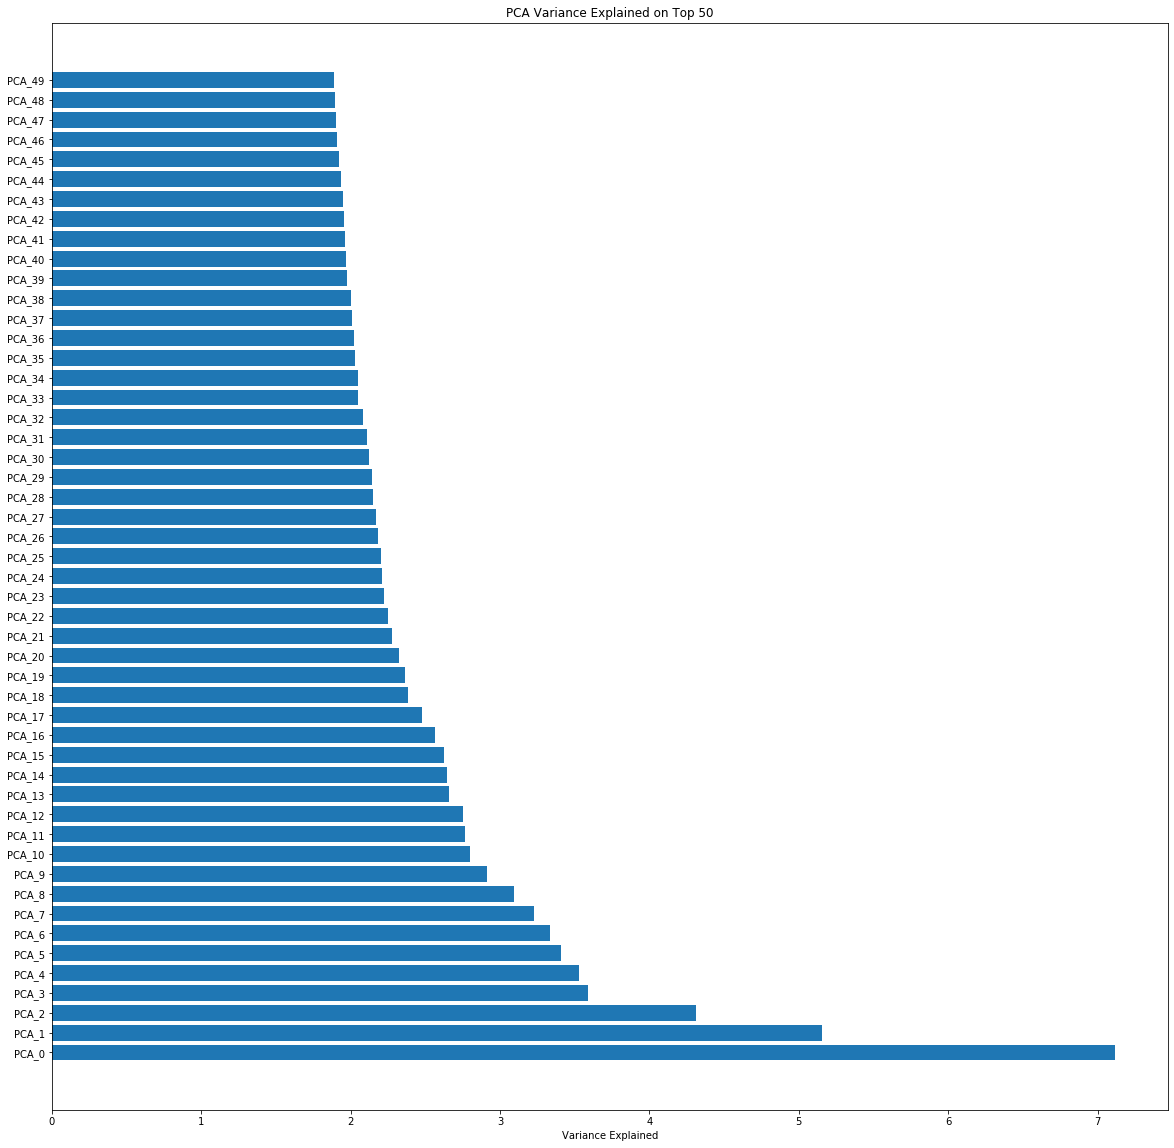

In [38]:
data = pca.explained_variance_[0:50]
pca_boundaries = np.arange(50)
pca_features = []
for i in pca_boundaries:
    feature_name = "PCA_" + str(i)
    pca_features.append(feature_name)

plt.figure(figsize=(20,20))
plt.barh(pca_boundaries, data, )
plt.yticks(pca_boundaries, pca_features)
plt.xlabel("Variance Explained")
plt.title("PCA Variance Explained on Top 50")


Text(0.5, 1.0, 'PCA Variance Explained on Top 50')

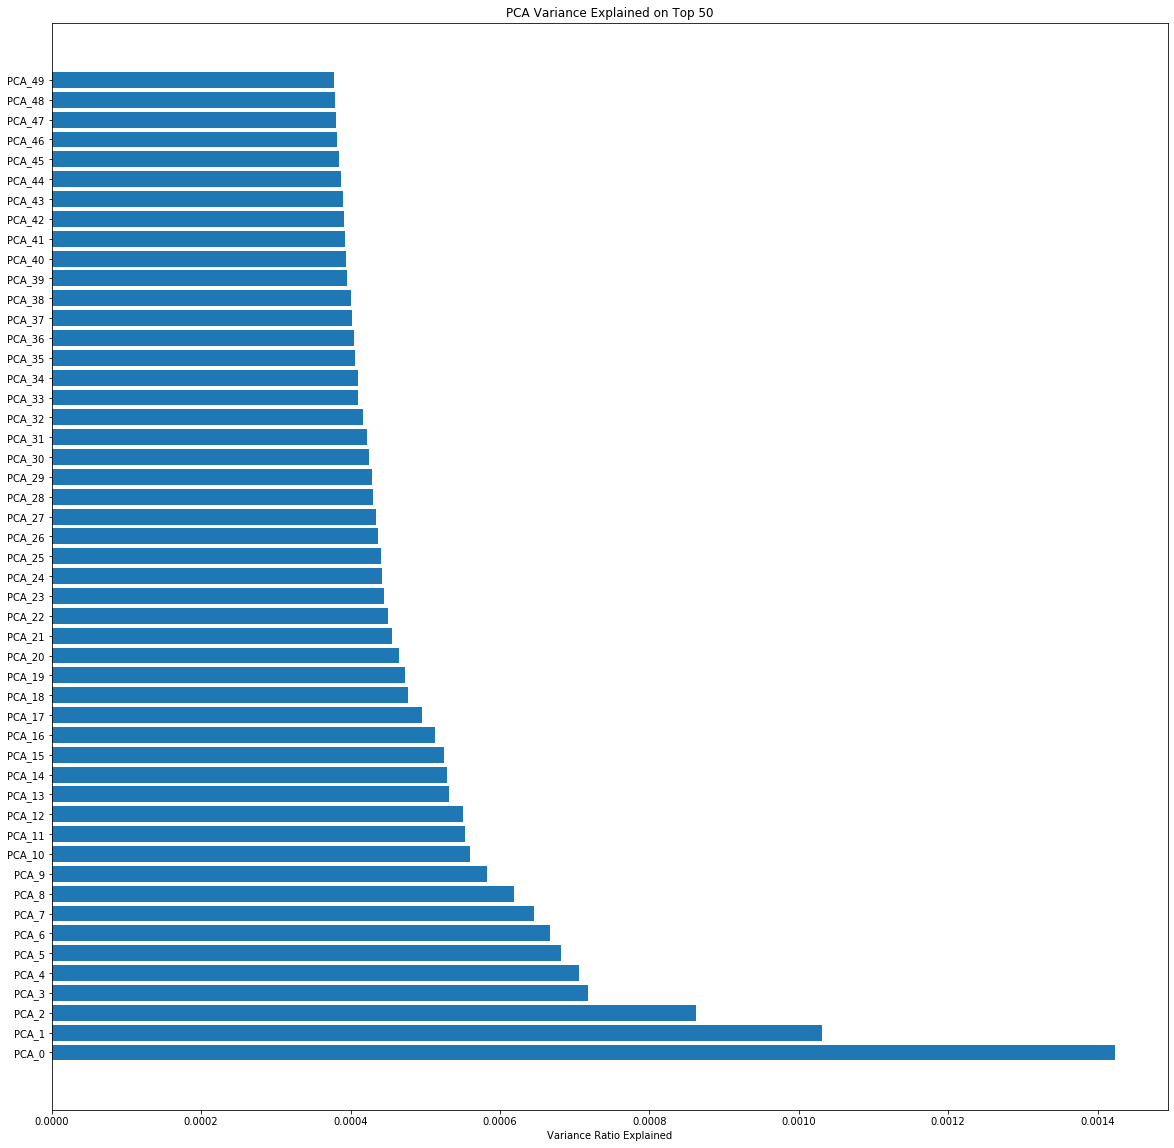

In [39]:
data = pca.explained_variance_ratio_[0:50]
pca_boundaries = np.arange(50)
pca_features = []
for i in pca_boundaries:
    feature_name = "PCA_" + str(i)
    pca_features.append(feature_name)

plt.figure(figsize=(20,20))
plt.barh(pca_boundaries, data, )
plt.yticks(pca_boundaries, pca_features)
plt.xlabel("Variance Ratio Explained")
plt.title("PCA Variance Explained on Top 50")

## 4.5 Logistic Regression with PCA

In [49]:
clf_logr = LogisticRegression(multi_class='ovr')
clf_logr.fit(X_train_pca, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
score_training = clf_logr.score(X_train_pca, target_train)
score_test = clf_logr.score(X_test_pca, target_test)
print("Accuracy for the training set is %f, the test set is %f" % \
     (score_training, score_test))

Accuracy for the training set is 0.668587, the test set is 0.672572


## 4.6 Random Forest with PCA

In [54]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state = 1)
clf_rf.fit(X_train_pca, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
score_training = clf_rf.score(X_train_pca, target_train)
score_test = clf_rf.score(X_test_pca, target_test)
print("Accuracy for the training set is %f, the test set is %f" % \
     (score_training, score_test))

Accuracy for the training set is 0.999764, the test set is 0.644960
